#### Homework 2
#### Kishore Narendran | 14644574 | narendrk@uci.edu

#### Problem 1 - Linear Regression

##### a) Load the "data/curve80.txt" data set, and split it into 75% / 25% training/test without shuffling.

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml
import warnings
warnings.filterwarnings('ignore')

# (a) Loading the data from the curve80.txt file, and splitting to
#       75-25, training and test data
data = np.genfromtxt("data/curve80.txt",delimiter=None)
X = data[:, 0] # First column is feature
X = X[:,np.newaxis] # code expects shape (M,N) so make sure it's 2-dimensional
Y = data[:, 1] # Second column is the result
Xtr,Xte,Ytr,Yte = ml.splitData(X,Y,0.75) # split data set 75/25
Ytr = Ytr[:, np.newaxis]
Yte = Yte[:, np.newaxis] # Ytr, Yte also needs to be made into a 2-dimensional matrix

##### (b) Use the provided linearRegress class to create a linear regression predictor of y given x. Plot the resulting function, and the training data in a single plot.

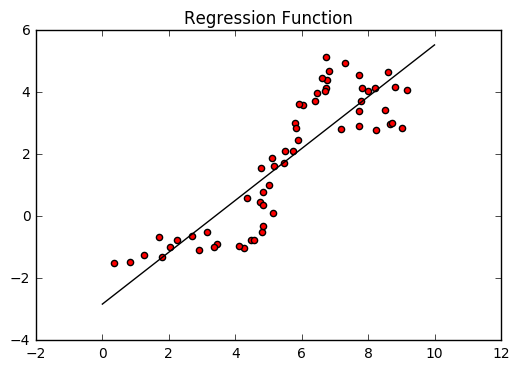

Regression Coefficients	=	[[-2.82765049  0.83606916]]
Mean Square Error on Training Data	=	1.12771195561
Mean Square Error on Test Data	=	2.24234920301


In [21]:
# (b) Plotting the linear regression prediction function, and training data,
#       finding the regression coefficients, finding MSE of train and test data
lr = ml.linear.linearRegress(Xtr, Ytr) # create and train model
xs = np.linspace(0, 10, 200) # densely sample possible x-values
xs = xs[:, np.newaxis] # force "xs" to be an Mx1 matrix
ys = lr.predict(xs) # make predictions at xs
plt.scatter(Xtr, Ytr, c = 'red') # Plotting the training data points
plt.plot(xs, ys, c= 'black') # Plotting the predictor line
plt.title('Regression Function')
plt.show()
print 'Regression Coefficients\t=\t', lr.theta
YTrainPred = lr.predict(Xtr)
YTestPred = lr.predict(Xte)
mseTrain = np.mean((YTrainPred - Ytr) ** 2)
mseTest = np.mean((YTestPred - Yte) ** 2)
print 'Mean Square Error on Training Data\t=\t', mseTrain
print 'Mean Square Error on Test Data\t=\t', mseTest


##### (c) Fitting y = f(x) with polynomial functions of increasing order. Plotting the respective functions, and checking the training and test error on the polynomial functions.

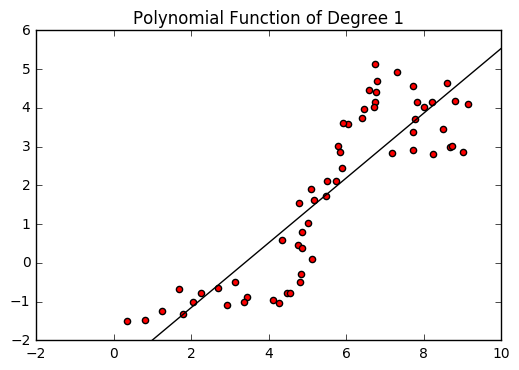

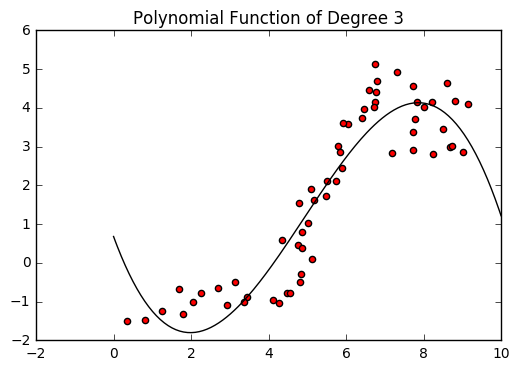

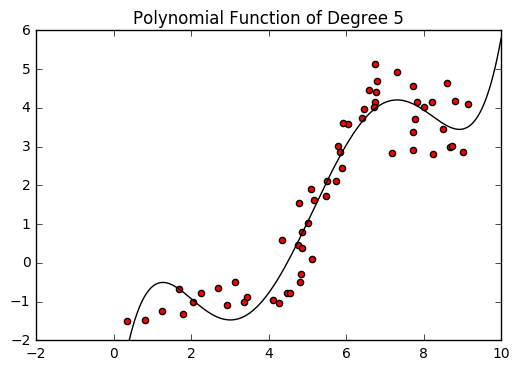

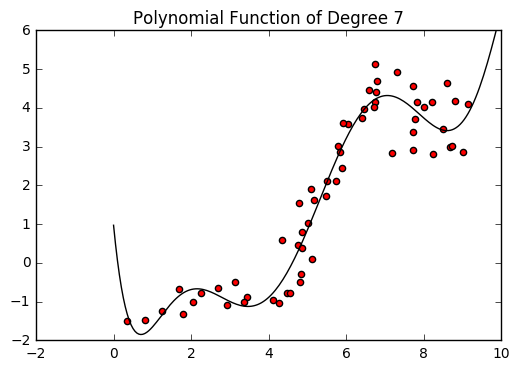

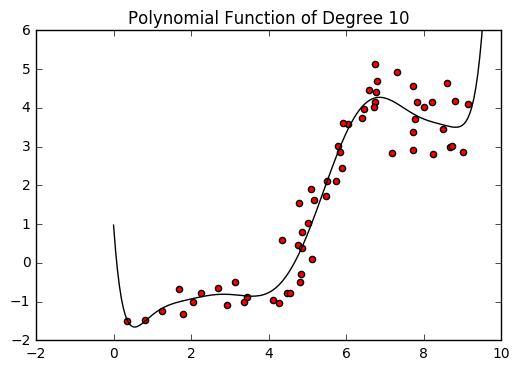

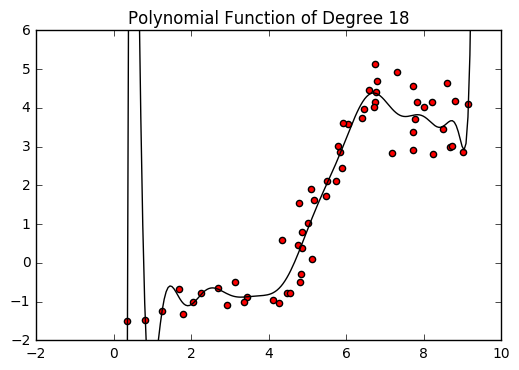

In [22]:
# (c) Fitting y = f(x) with polynomial functions of increasing order
degrees = [1, 3, 5, 7, 10, 18]
trainingError = []
testError = []
for degree in degrees:
    # Scaling and making polynomial features
    XtrP = ml.transforms.fpoly(Xtr, degree, bias=False)
    XtrP, params = ml.transforms.rescale( XtrP )
    lr = ml.linear.linearRegress( XtrP, Ytr )
    XteP,_ = ml.transforms.rescale( ml.transforms.fpoly(Xte, degree, False ), params )
    xsP,_ = ml.transforms.rescale( ml.transforms.fpoly(xs, degree, False ), params )

    # Predicting for xs, and plotting predictor function
    ys = lr.predict(xsP) # make predictions at xs
    plt.scatter(Xtr, Ytr, c = 'red')
    ax = plt.axis()
    plt.plot(xs, ys, c = 'black') # Plotting the predictor line
    plt.axis(ax)
    plt.title("Polynomial Function of Degree " + str(degree))
    plt.show()

    # Calculating error in test and training data
    YTrainPredP = lr.predict(XtrP)
    YTestPredP = lr.predict(XteP)
    trainingError.append(np.mean((YTrainPredP - Ytr) ** 2))
    testError.append(np.mean((YTestPredP - Yte) ** 2))

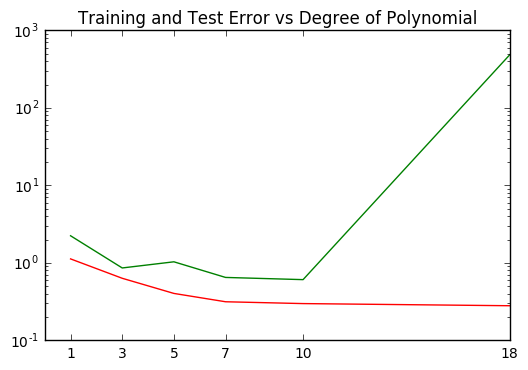

In [23]:
plt.semilogy(degrees, trainingError, c = 'red')
plt.semilogy(degrees, testError, c = 'green')
plt.xticks(degrees, degrees)
plt.title("Training and Test Error vs Degree of Polynomial")
plt.show()

From the above plot, it is evident that the ideal choice of degree of polynomial is 10 since that has the lowest MSE.

#### Problem 2 - Cross Validation

##### Performing n-Fold Validation Tests across polynomials of different degrees and then plotting MSE

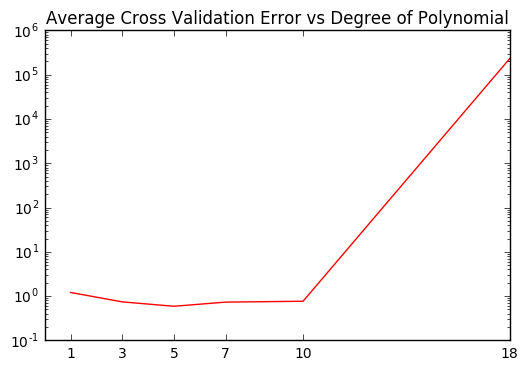

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml

data = np.genfromtxt("data/curve80.txt",delimiter=None)
X = data[:, 0] # First column is feature
X = X[:,np.newaxis] # code expects shape (M,N) so make sure it's 2-dimensional
Y = data[:, 1] # Second column is the result
Xtr,Xte,Ytr,Yte = ml.splitData(X,Y,0.75) # split data set 75/25

nFolds = 5;
degrees = [1, 3, 5, 7, 10, 18]
validationMSEs = []
for degree in degrees:
    J = []
    for iFold in range(nFolds):
        # ith block as validation
        Xti,Xvi,Yti,Yvi = ml.crossValidate(Xtr,Ytr,nFolds,iFold)
        Yvi = Yvi[:, np.newaxis]
        XtiP = ml.transforms.fpoly(Xti, degree, bias=False)
        XtiP, params = ml.transforms.rescale( XtiP )
        learner = ml.linear.linearRegress( XtiP, Yti )
        XviP,_ = ml.transforms.rescale( ml.transforms.fpoly(Xvi, degree, False ), params )

        # Calculating error in test and training data
        YValPredP = learner.predict(XviP)
        valError = np.mean((YValPredP - Yvi) ** 2)
        J.append(valError)
    validationMSEs.append(np.mean(J))
plt.semilogy(degrees, validationMSEs, c = 'red')
plt.xticks(degrees, degrees)
plt.title('Average Cross Validation Error vs Degree of Polynomial')
plt.show()


From the above plot of Cross Validation Error vs Degree of Polynomial, the lowest error is for the polynomial of degree 5. From this test, a polynomial of degree 5 would be the ideal linear regression choice. The MSE as evaluated in Problem 1 showed the lowest error for a polynomial of degree 10. 